## Data Breach Analytics 2005 - 2017 (Part III)
#### by Miriam Rodriguez 

## Client's two null hypotheses

1. “Two data breach types—DISC and HACK—are equal in the harm caused to organizations in terms of records affected (“TotalRecords”)”. 

2. “All data breach types are equal in the harm caused to organizations in terms of records affected (“TotalRecords”)”. 

#### These hypotheses will be tested, results interpreted and implications will be provided.

In [2]:
# import packages

#import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline


In [5]:
#import breach data ... open or read the breach data
df = pd.read_csv("databreach_cleaned.csv")
df.head(2)

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",37.090240,-95.712891,5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",35.960638,-83.920739,5,6,0,3,75725457


In [6]:
df_incident = df[["Description"]]
df_incident

,Description
0,"An external auditor lost a CD with names, Soci..."
1,"There are 67,000 TennCare \r\n enro..."
2,A laptop computer was stolen from a vehicle.
3,A Fidelity laptop used by a former Fidelity em...
4,A former contract worker of a Japanese commerc...
5,"Patient names, addresses, Social Security numb..."
6,At least 18 colleges are scrambling to inform ...
7,Hundreds of files - with Social Security numbe...
8,A computer was compromised by a virus. That ca...
9,\N\r\nLocation of breached information: Other\...


In [7]:
# text preprocessing for incident descriptions
# currently the data are in list ... convert to string
tokens = str(df_incident)
#lowercases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)



In [8]:
# Word frequency analysis for breach descriptions
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)
fdist





FreqDist({'information': 20, 'breached': 19, 'location': 17, 'nbus': 8, 'email': 8, 'laptop': 7, 'entity': 4, 'covered': 4, 'theft': 3, 'paper': 3, ...})

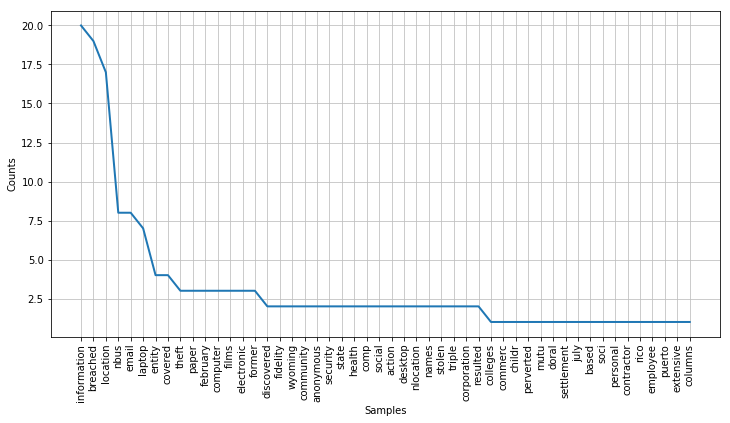

In [9]:
plt.figure(figsize=(12,6))
fdist.plot(50)

## 2. Popular words from the breach dataset

In [11]:
# Most popular words for breaches
fdist.most_common(50)



[('information', 20),
 ('breached', 19),
 ('location', 17),
 ('nbus', 8),
 ('email', 8),
 ('laptop', 7),
 ('entity', 4),
 ('covered', 4),
 ('theft', 3),
 ('paper', 3),
 ('february', 3),
 ('computer', 3),
 ('films', 3),
 ('electronic', 3),
 ('former', 3),
 ('discovered', 2),
 ('fidelity', 2),
 ('wyoming', 2),
 ('community', 2),
 ('anonymous', 2),
 ('security', 2),
 ('state', 2),
 ('health', 2),
 ('comp', 2),
 ('social', 2),
 ('action', 2),
 ('desktop', 2),
 ('nlocation', 2),
 ('names', 2),
 ('stolen', 2),
 ('triple', 2),
 ('corporation', 2),
 ('resulted', 2),
 ('colleges', 1),
 ('commerc', 1),
 ('childr', 1),
 ('perverted', 1),
 ('mutu', 1),
 ('doral', 1),
 ('settlement', 1),
 ('july', 1),
 ('based', 1),
 ('soci', 1),
 ('personal', 1),
 ('contractor', 1),
 ('rico', 1),
 ('employee', 1),
 ('puerto', 1),
 ('extensive', 1),
 ('columns', 1)]

The most popular words for breach descriptions relate to theft of electronic data or stolen data, employees such as former and contractors in corporations.

In [21]:
# Word frequency analysis using bi-grams
# what if you have additional stopwords to be removed
tokens = str(df_incident)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwords
more_stopwords = set(('location', 'three', 'member', 'covered', 'discovered', 'soci', 'based', 'resulted', 'comp', 'perverted', 'action', 'doral', 'childre', 'ago', 'hour', 'year', 'abuse', 'also', 'pm', 'now', 'columns', 'else', 'simply', 'new', 'yesterday', 'getting'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi





FreqDist({('breached', 'information'): 19, ('information', 'email'): 8, ('email', 'nbus'): 8, ('nbus', 'breached'): 7, ('information', 'paper'): 3, ('paper', u'film'): 3, ('social', 'security'): 2, (u'film', 'breached'): 2, ('nlocation', 'breached'): 2, ('information', 'electronic'): 2, ...})

## 3. Popular bi-grams 

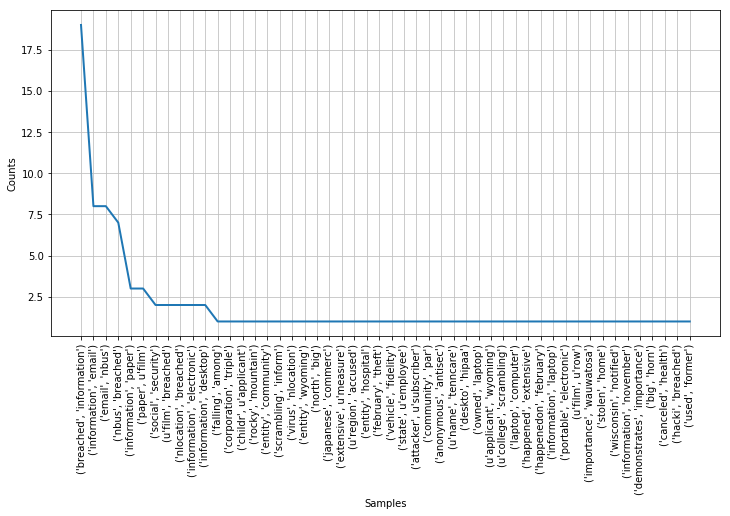

In [22]:
# plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_bi.plot(50)

In [23]:
# Most popular words 
fdist_bi.most_common(50)

[(('breached', 'information'), 19),
 (('information', 'email'), 8),
 (('email', 'nbus'), 8),
 (('nbus', 'breached'), 7),
 (('information', 'paper'), 3),
 (('paper', u'film'), 3),
 (('social', 'security'), 2),
 ((u'film', 'breached'), 2),
 (('nlocation', 'breached'), 2),
 (('information', 'electronic'), 2),
 (('information', 'desktop'), 2),
 (('falling', 'among'), 1),
 (('corporation', 'triple'), 1),
 (('childr', u'applicant'), 1),
 (('rocky', 'mountain'), 1),
 (('entity', 'community'), 1),
 (('scrambling', 'inform'), 1),
 (('virus', 'nlocation'), 1),
 (('entity', 'wyoming'), 1),
 (('north', 'big'), 1),
 (('japanese', 'commerc'), 1),
 (('extensive', u'measure'), 1),
 ((u'region', 'accused'), 1),
 (('entity', 'hospital'), 1),
 (('february', 'theft'), 1),
 (('vehicle', 'fidelity'), 1),
 (('state', u'employee'), 1),
 (('attacker', u'subscriber'), 1),
 (('community', 'par'), 1),
 (('anonymous', 'antisec'), 1),
 ((u'name', 'tenncare'), 1),
 (('deskto', 'hipaa'), 1),
 (('owned', 'laptop'), 1)

In [26]:
df_incident.to_csv('databreach.txt', index=False, sep=' ', header=None)

## Word cloud using a mask image. 

(-0.5, 399.5, 199.5, -0.5)

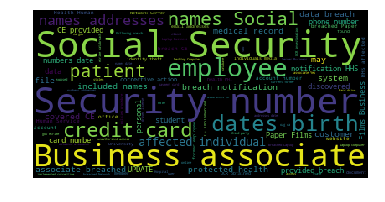

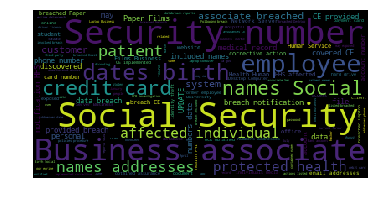

In [33]:
# word cloud auto.txt
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Read the whole text.
text = open(path.join('databreach.txt')).read()

#additional stopwords
stopwords = set(STOPWORDS)
stopwords.add("report")
stopwords.add("company")
stopwords.add("ago")
stopwords.add("said")
stopwords.add("hours")
stopwords.add("will")
stopwords.add("well")
stopwords.add("year")
stopwords.add("abuse")
stopwords.add("also")
stopwords.add("pm")
stopwords.add("now")
stopwords.add("information")
stopwords.add("happened")
stopwords.add("home")
stopwords.add("hour")
stopwords.add("entity")
stopwords.add("big")
stopwords.add("used")
stopwords.add("name")
stopwords.add("par")
stopwords.add("else")
stopwords.add("simply")
stopwords.add("new")
stopwords.add("yesterday")
stopwords.add("getting")
stopwords.add("vehicle")
stopwords.add("location")
stopwords.add("present")
stopwords.add("film")
stopwords.add("row")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")





## The themes here appear to be social security number, credit cards, birthdates, names and addressess, employees and business associates.

## The results of testing the hypotheses

 ## The null hypotheses cannot be ruled out for either hypotheses.
